In [17]:
import pandas as pd
import numpy as np



In [25]:
#Llegim i ho passem a un dataframe
dades_covid: pd.DataFrame = pd.read_csv("aga_diari_utf8.csv",sep=";")
dades_covid.head()


,NOM,CODI,DATA,SEXE,GRUP_EDAT,RESIDENCIA,CASOS_CONFIRMAT,PCR,TAR,INGRESSOS_TOTAL,...,INGRESSATS_CRITIC,EXITUS,CASOS_PCR,CASOS_TAR,POSITIVITAT_PCR_NUM,POSITIVITAT_TAR_NUM,POSITIVITAT_PCR_DEN,POSITIVITAT_TAR_DEN,VACUNATS_DOSI_1,VACUNATS_DOSI_2
0,ALT CAMP I CONCA DE BARBERÀ,6,2022-01-16,Dona,0 a 9,No,9,0,8,0,...,0,0,0,9,0,5,0,7,0,0
1,ALT CAMP I CONCA DE BARBERÀ,6,2022-01-16,Dona,10 a 19,No,1,0,3,0,...,0,0,0,1,0,0,0,2,1,0
2,ALT CAMP I CONCA DE BARBERÀ,6,2022-01-16,Dona,20 a 29,No,3,0,1,0,...,0,0,0,3,0,1,0,1,0,0
3,ALT CAMP I CONCA DE BARBERÀ,6,2022-01-16,Dona,30 a 39,No,6,0,4,0,...,0,0,0,6,0,1,0,2,1,0
4,ALT CAMP I CONCA DE BARBERÀ,6,2022-01-16,Dona,40 a 49,No,8,0,9,0,...,0,0,0,8,0,3,0,7,0,0


In [26]:
dades_covid.columns

Index(['NOM', 'CODI', 'DATA', 'SEXE', 'GRUP_EDAT', 'RESIDENCIA',
       'CASOS_CONFIRMAT', 'PCR', 'TAR', 'INGRESSOS_TOTAL', 'INGRESSOS_CRITIC',
       'INGRESSATS_TOTAL', 'INGRESSATS_CRITIC', 'EXITUS', 'CASOS_PCR',
       'CASOS_TAR', 'POSITIVITAT_PCR_NUM', 'POSITIVITAT_TAR_NUM',
       'POSITIVITAT_PCR_DEN', 'POSITIVITAT_TAR_DEN', 'VACUNATS_DOSI_1',
       'VACUNATS_DOSI_2'],
      dtype='object')

In [27]:
cols = ['CASOS_CONFIRMAT', 'PCR', 'TAR', 'INGRESSOS_TOTAL', 'INGRESSOS_CRITIC',
       'INGRESSATS_TOTAL', 'INGRESSATS_CRITIC', 'EXITUS', 'CASOS_PCR',
       'CASOS_TAR', 'POSITIVITAT_PCR_NUM']
dades_covid.loc[0:5,"CASOS_CONFIRMAT":"POSITIVITAT_PCR_NUM"]


,CASOS_CONFIRMAT,PCR,TAR,INGRESSOS_TOTAL,INGRESSOS_CRITIC,INGRESSATS_TOTAL,INGRESSATS_CRITIC,EXITUS,CASOS_PCR,CASOS_TAR,POSITIVITAT_PCR_NUM
0,9,0,8,0,0,0,0,0,0,9,0
1,1,0,3,0,0,0,0,0,0,1,0
2,3,0,1,0,0,1,0,0,0,3,0
3,6,0,4,0,0,1,0,0,0,6,0
4,8,0,9,0,0,0,0,0,0,8,0
5,8,0,5,0,0,0,0,0,0,8,0


In [21]:
barbera_mask: pd.Series = dades_covid.loc[:,"NOM"] == 'ALT CAMP I CONCA DE BARBERÀ'
barbera_mask

barbera_dades: pd.DataFrame = (dades_covid.loc[barbera_mask,['DATA','CASOS_CONFIRMAT']]
                                .query("DATA>'2021-12-01'")
                                .groupby('DATA')
                                .sum()

                                )


In [22]:
lleida_mask: pd.Series = dades_covid.loc[:,"NOM"] == 'LLEIDA'
lleida_mask

lleida_dades: pd.DataFrame = (dades_covid.loc[lleida_mask,['DATA','POSITIVITAT_TAR_NUM']]
                                .query("DATA>'2021-12-01'")
                                .groupby('DATA')
                                .sum()

                                )
lleida_dades

,POSITIVITAT_TAR_NUM
DATA,
2021-12-02,117
2021-12-03,108
2021-12-04,78
2021-12-05,58
2021-12-06,90
2021-12-07,161
2021-12-08,110
2021-12-09,171
2021-12-10,154


<bound method Axes.bar of <AxesSubplot:xlabel='DATA'>>

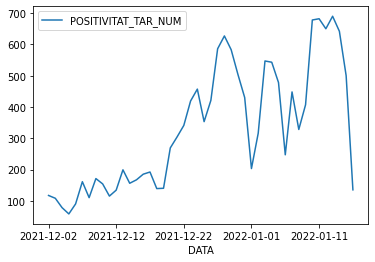

In [ ]:
lleida_dades.plot().bar

In [35]:
print(dades_covid)
type(dades_covid)

                                NOM  CODI        DATA  SEXE GRUP_EDAT  \
0       ALT CAMP I CONCA DE BARBERÀ     6  2022-01-16  Dona     0 a 9   
1       ALT CAMP I CONCA DE BARBERÀ     6  2022-01-16  Dona   10 a 19   
2       ALT CAMP I CONCA DE BARBERÀ     6  2022-01-16  Dona   20 a 29   
3       ALT CAMP I CONCA DE BARBERÀ     6  2022-01-16  Dona   30 a 39   
4       ALT CAMP I CONCA DE BARBERÀ     6  2022-01-16  Dona   40 a 49   
...                             ...   ...         ...   ...       ...   
620356      VALLÈS ORIENTAL CENTRAL    69  2020-03-01  Home   60 a 69   
620357      VALLÈS ORIENTAL CENTRAL    69  2020-03-01  Home   70 a 79   
620358      VALLÈS ORIENTAL CENTRAL    69  2020-03-01  Home  80 o més   
620359      VALLÈS ORIENTAL CENTRAL    69  2020-03-01  Home       NaN   
620360      VALLÈS ORIENTAL CENTRAL    69  2020-03-01  Tots      Tots   

       RESIDENCIA  CASOS_CONFIRMAT  PCR  TAR  INGRESSOS_TOTAL  ...  \
0              No                9    0    8         

pandas.core.frame.DataFrame

In [51]:
#print(barbera_mask)
barbera_dades_total: pd.Series = dades_covid.loc[barbera_mask,'CASOS_CONFIRMAT']
#calculem la mitja
print((sum(barbera_dades_total)/len(barbera_dades_total)))
#barbera_mitja = barbera_dades_total/dades_covid.loc[:,'CASOS CONFIRMAT'].groupby('DATA').count()
#print(barbera_mitja);


0.718860469952173


In [48]:
#la media es buen descriptor si los dados son mas o menos homogeneos, pero en casos de varios datos extremos
#la media no es el mejor indicador para un estudio.
print(barbera_dades_total.mean());

CASOS_CONFIRMAT    0.71886
dtype: float64


In [62]:
# Get all keys
keys: pd.Series = barbera_dades_total.drop_duplicates()
freqs: dict = dict.fromkeys(keys, 0)

#Get all values(frequencie)
for num in barbera_dades_total:
    freqs[num] += 1

#Get maximum frequency
keys_list: list[int] = list[freqs.keys()]
freqs_list: list[int] = list[freqs.values()]

max_freq_value: int = max(freqs_list)
max_freq_index: int = freqs_list.index(max_freq_value)
mode:           int = keys_list[max_freq_index]
print(mode)

#diccionari_barbera =barbera_dades_total.to_dict
#type(diccionari_barbera)
#print(diccionari_barbera.top(10))
#print(diccionari_barbera)

TypeError: 'types.GenericAlias' object is not iterable